In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Spam Email Classifier - spam.csv')

In [3]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3290,ham,I'm not smoking while people use \wylie smokes...,NaN,NaN,NaN
4823,ham,Not thought bout it... || Drink in tap & spile...,NaN,NaN,NaN
1015,ham,"Dear,regret i cudnt pick call.drove down frm c...",NaN,NaN,NaN
5561,ham,Get me out of this dump heap. My mom decided t...,NaN,NaN,NaN
5437,ham,Am slow in using biola's fne,NaN,NaN,NaN
3696,spam,You are a winner you have been specially selec...,NaN,NaN,NaN
282,ham,Ok. I asked for money how far,NaN,NaN,NaN
2070,spam,Sexy Singles are waiting for you! Text your AG...,NaN,NaN,NaN
4036,ham,Dont flatter yourself... Tell that man of mine...,NaN,NaN,NaN
4698,ham,Yes fine,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

# Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
#drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample(10)

,v1,v2
4065,ham,Fyi I'm gonna call you sporadically starting a...
1899,ham,I love working from home :)
3028,ham,What is your record for one night? :)
2748,ham,Send his number and give reply tomorrow mornin...
2426,spam,Valentines Day Special! Win over �1000 in our ...
2010,ham,Dunno lei... I thk mum lazy to go out... I nev...
1051,ham,Do u noe wat time e place dat sells 4d closes?
836,spam,Do you want 750 anytime any network mins 150 t...
2245,ham,How did you find out in a way that didn't incl...
626,ham,How many licks does it take to get to the cent...


In [8]:
#renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(10)

,target,text
3269,ham,K actually can you guys meet me at the sunoco ...
584,ham,So how's scotland. Hope you are not over showi...
3002,ham,I will see in half an hour
4297,spam,WELL DONE! Your 4* Costa Del Sol Holiday or �5...
1868,ham,Today my system sh get ready.all is well and i...
4634,ham,How come i din c �_... Yup i cut my hair...
2523,ham,"Sorry, I'll call later"
246,ham,I asked you to call him now ok
1254,ham,What your plan for pongal?
464,ham,Ok i am on the way to railway


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
#checking missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
#checking for duplicate values
df.duplicated().sum()

409

In [14]:
#removing duplicates
df = df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5163, 2)

# EDA

In [17]:
df['target'].value_counts()

target
0    4516
1     647
Name: count, dtype: int64

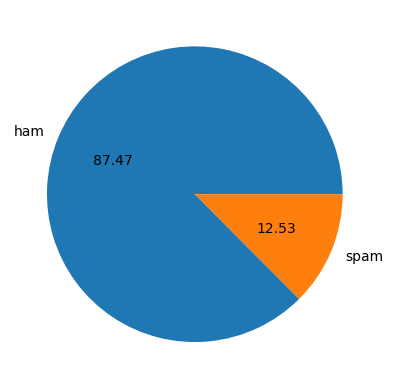

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [19]:
#data is imbalanced

In [20]:
!pip install nltk

In [21]:
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\roych\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
df['num_characters'] = df['text'].apply(len)

In [24]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
#num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
df[['num_sentences','num_words','num_characters']].describe()

,num_sentences,num_words,num_characters
count,5163.000000,5163.000000,5163.000000
mean,1.963974,18.444122,78.811156
std,1.448008,13.327940,58.153491
min,1.000000,1.000000,2.000000
25%,1.000000,9.000000,36.000000
50%,1.000000,15.000000,60.000000
75%,2.000000,26.000000,116.000000
max,38.000000,220.000000,910.000000


In [30]:
#ham mails
df[df['target']==0][['num_sentences','num_words','num_characters']].describe()

,num_sentences,num_words,num_characters
count,4516.000000,4516.000000,4516.000000
mean,1.820195,17.123782,70.428919
std,1.383657,13.493970,56.356310
min,1.000000,1.000000,2.000000
25%,1.000000,8.000000,34.000000
50%,1.000000,13.000000,52.000000
75%,2.000000,22.000000,90.000000
max,38.000000,220.000000,910.000000


In [31]:
#spam mails
df[df['target']==1][['num_sentences','num_words','num_characters']].describe()

,num_sentences,num_words,num_characters
count,647.000000,647.000000,647.000000
mean,2.967543,27.659969,137.318393
std,1.490069,7.038065,30.096861
min,1.000000,2.000000,13.000000
25%,2.000000,25.000000,130.000000
50%,3.000000,29.000000,148.000000
75%,4.000000,32.000000,157.000000
max,9.000000,46.000000,223.000000


In [32]:
import seaborn as sns

C:\Users\roych\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\roych\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

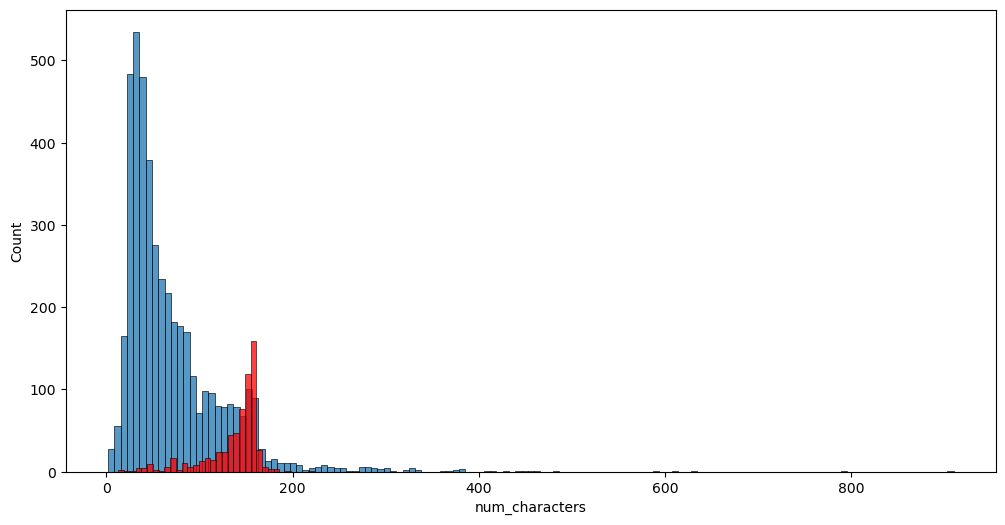

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

C:\Users\roych\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\roych\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_words', ylabel='Count'>

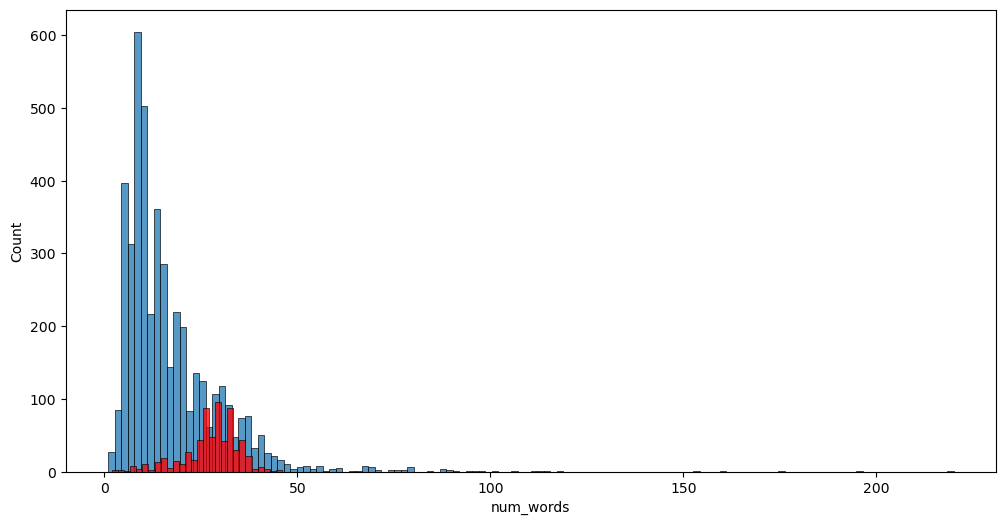

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

C:\Users\roych\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\roych\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_sentences', ylabel='Count'>

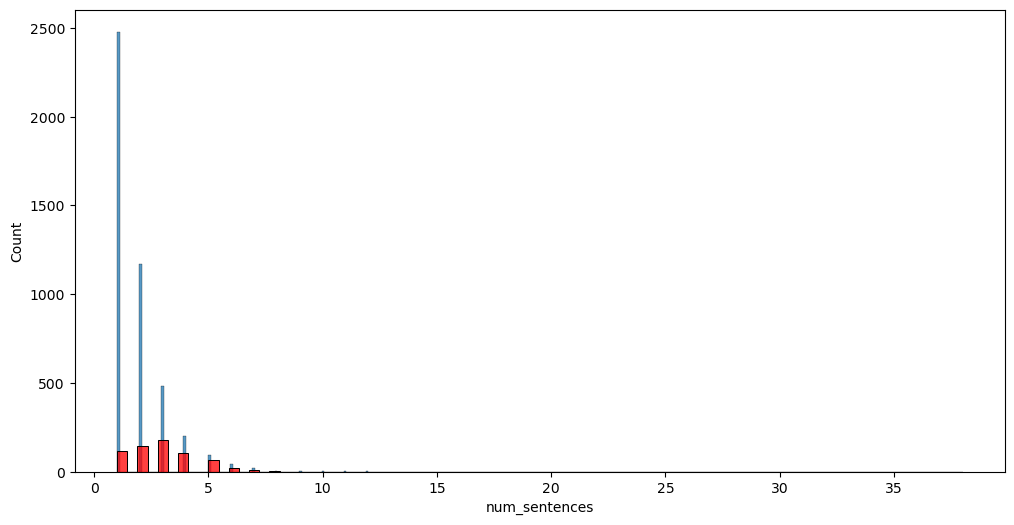

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='red')

C:\Users\roych\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\roych\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\roych\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


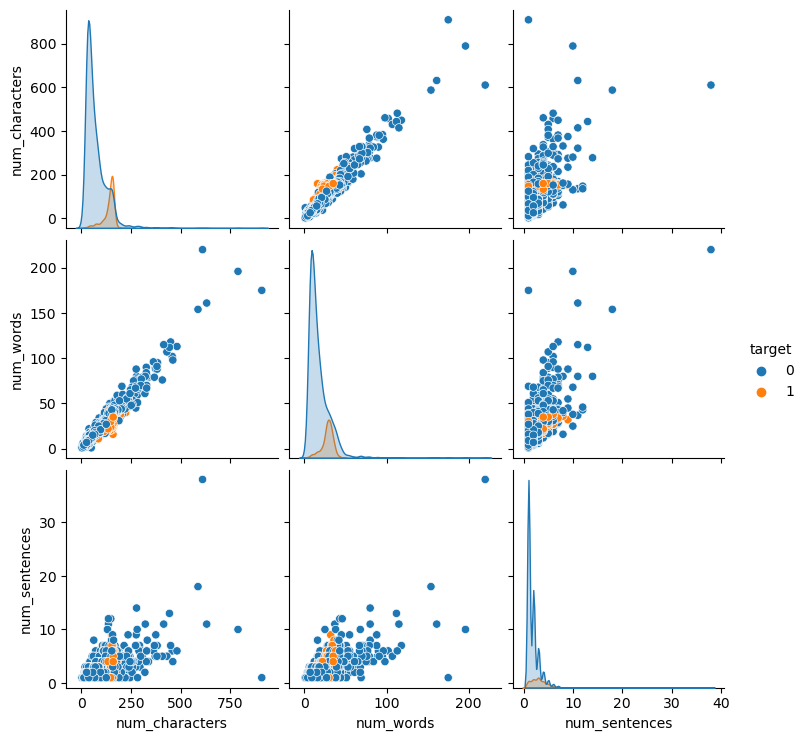

In [36]:
sns.pairplot(df,hue='target')

# Data Preprocessing

In [37]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\roych\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [38]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [39]:
from nltk.stem import PorterStemmer

def transform_text(text):
    ps = PorterStemmer()  # Instantiate the stemmer
    text = text.lower()
    
    # Tokenize the text
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():  # Keep only alphanumeric tokens
            y.append(i)
    
    text = y[:]  # Assign filtered tokens to text
    y.clear()  # Clear y for reuse
    
    # Remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]  # Assign to text again
    y.clear()  # Clear y for reuse
    
    # Perform stemming
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [40]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [41]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [42]:
df['text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5163, dtype: object

In [43]:
df['transformed_text']=df['text'].apply(transform_text)

In [44]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [45]:
!pip install wordcloud

In [46]:
from wordcloud import WordCloud
wc = WordCloud(width=1000, height=1000, min_font_size=10, background_color='white')

In [47]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

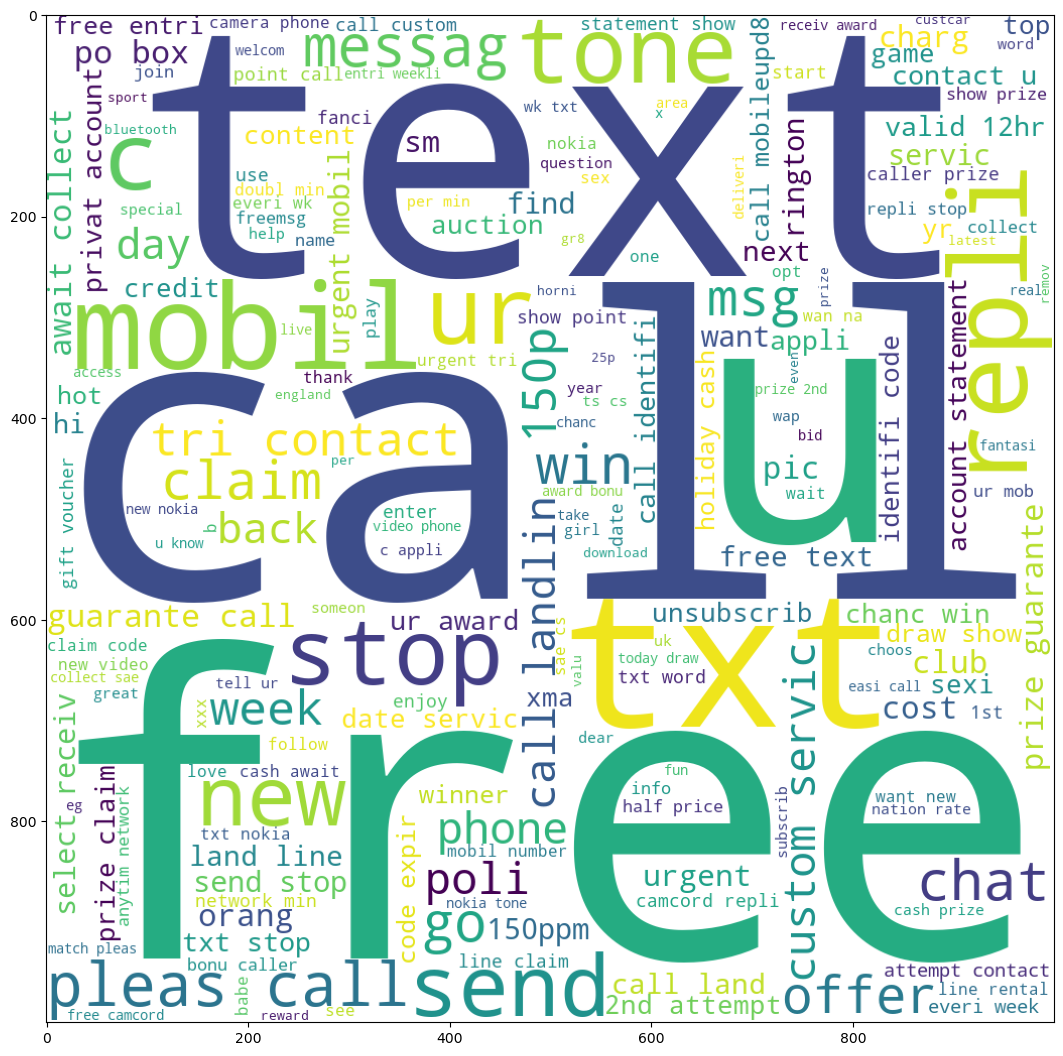

In [48]:
plt.figure(figsize=(13,14))
plt.imshow(spam_wc)

In [49]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

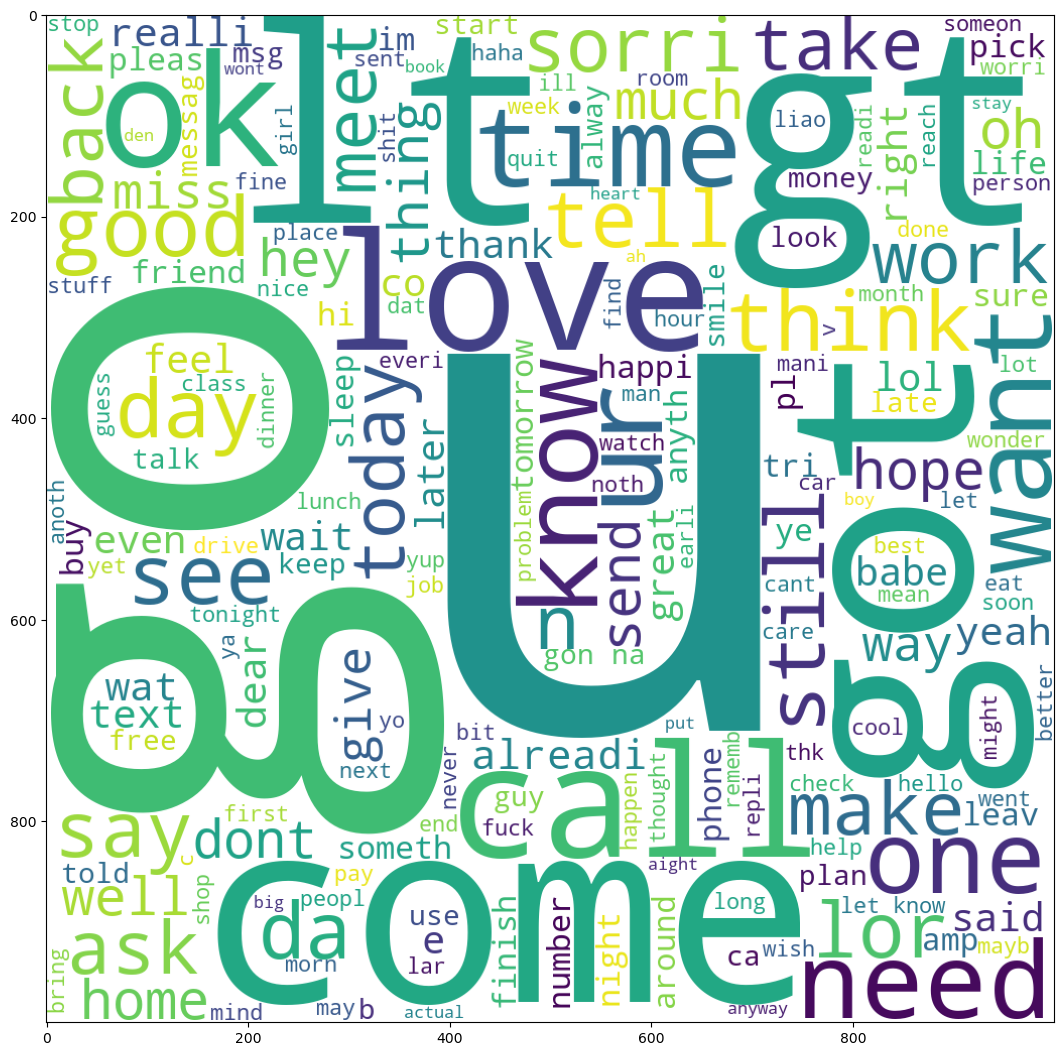

In [50]:
plt.figure(figsize=(13,14))
plt.imshow(ham_wc)

# Model Building

In [51]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf =TfidfVectorizer(max_features=3000)

In [52]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [54]:
X.shape

(5163, 3000)

In [55]:
y = df['target'].values

In [56]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [59]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [60]:
gnb= GaussianNB()
mnb= MultinomialNB()
bnb= BernoulliNB()

In [61]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8586640851887706
[[780 132]
 [ 14 107]]
0.4476987447698745


In [62]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9806389157792836
[[909   3]
 [ 17 104]]
0.9719626168224299


In [63]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.978702807357212
[[909   3]
 [ 19 102]]
0.9714285714285714


In [64]:
#tfidf----> mnb

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [66]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [67]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'Rf' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt
}

In [68]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy,precision

In [69]:
train_classifier(svc,X_train,y_train, X_test, y_test)

(0.9748305905130688, 0.9439252336448598)

In [70]:
accuracy_scores = []
precision_scores = []  

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print("For ", name)
    print("Accuracy- ", current_accuracy)
    print("Precision- ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)  


For  SVC
Accuracy-  0.9748305905130688
Precision-  0.9439252336448598
For  KN
Accuracy-  0.9303000968054211
Precision-  1.0
For  NB
Accuracy-  0.9806389157792836
Precision-  0.9719626168224299
For  DT
Accuracy-  0.957405614714424
Precision-  0.8130081300813008
For  LR
Accuracy-  0.9632139399806389
Precision-  0.9560439560439561
For  Rf
Accuracy-  0.972894482090997
Precision-  0.979381443298969
For  AdaBoost
Accuracy-  0.9622458857696031
Precision-  0.9270833333333334
For  BgC
Accuracy-  0.9641819941916747
Precision-  0.868421052631579
For  ETC
Accuracy-  0.9777347531461762
Precision-  0.9803921568627451
For  GBDT
Accuracy-  0.9535333978702807
Precision-  0.9397590361445783


In [71]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores})

In [72]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.974831,0.943925
1,KN,0.930300,1.000000
2,NB,0.980639,0.971963
3,DT,0.957406,0.813008
4,LR,0.963214,0.956044
5,Rf,0.972894,0.979381
6,AdaBoost,0.962246,0.927083
7,BgC,0.964182,0.868421
8,ETC,0.977735,0.980392
9,GBDT,0.953533,0.939759


In [73]:
#Improving model performance

In [74]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [75]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.974831
1,KN,Accuracy,0.930300
2,NB,Accuracy,0.980639
3,DT,Accuracy,0.957406
4,LR,Accuracy,0.963214
5,Rf,Accuracy,0.972894
6,AdaBoost,Accuracy,0.962246
7,BgC,Accuracy,0.964182
8,ETC,Accuracy,0.977735
9,GBDT,Accuracy,0.953533


In [76]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores})

In [77]:
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,SVC,0.974831,0.943925,0.974831,0.943925
1,KN,0.930300,1.000000,0.930300,1.000000
2,NB,0.980639,0.971963,0.980639,0.971963
3,DT,0.957406,0.813008,0.957406,0.813008
4,LR,0.963214,0.956044,0.963214,0.956044
5,Rf,0.972894,0.979381,0.972894,0.979381
6,AdaBoost,0.962246,0.927083,0.962246,0.927083
7,BgC,0.964182,0.868421,0.964182,0.868421
8,ETC,0.977735,0.980392,0.977735,0.980392
9,GBDT,0.953533,0.939759,0.953533,0.939759


In [78]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [79]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [80]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000_x,Precision_max_ft_3000_x,Accuracy_max_ft_3000_y,Precision_max_ft_3000_y
0,SVC,0.974831,0.943925,0.974831,0.943925,0.974831,0.943925
1,KN,0.930300,1.000000,0.930300,1.000000,0.930300,1.000000
2,NB,0.980639,0.971963,0.980639,0.971963,0.980639,0.971963
3,DT,0.957406,0.813008,0.957406,0.813008,0.957406,0.813008
4,LR,0.963214,0.956044,0.963214,0.956044,0.963214,0.956044
5,Rf,0.972894,0.979381,0.972894,0.979381,0.972894,0.979381
6,AdaBoost,0.962246,0.927083,0.962246,0.927083,0.962246,0.927083
7,BgC,0.964182,0.868421,0.964182,0.868421,0.964182,0.868421
8,ETC,0.977735,0.980392,0.977735,0.980392,0.977735,0.980392
9,GBDT,0.953533,0.939759,0.953533,0.939759,0.953533,0.939759


In [81]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))